# 2.1. Analysis: Analyzing Species Identified by NCBI CDS and NuoHMMER Across Complex I Subunits

This notebook presents an analysis comparing the number of species identified by two methods, **NCBI CDS** and **NuoHMMER**, across various **Complex I subunits**. The goal is to demonstrate the enhanced performance of the NuoHMMER method, which was developed to identify additional species not found by the NCBI CDS method.

#### **Key Steps in the Notebook:**

###### 1. **Data Preprocessing**
- **Loading data**: The notebook starts by loading genomic and species information from CSV files, including the results from both the NuoHMMER and NCBI CDS searches.
- **Merging datasets**: Genomic and species metadata are merged to create a unified dataset that combines both methods.

###### 2. **Classification of Complex I Subunit Variants**
- **Classifying species into Complex I subunit variants**: The `classify_complex_types` function assigns each species to a variant of Complex I (e.g., Nuo12, Nuo13, Nuo14, etc.), depending on the presence or absence of specific subunits.
- This classification helps determine the complexity of each species' Complex I assembly.

###### 3. **Boolean and Summation Tables**
- The `summarize_nuo_bool` function processes the boolean presence/absence tables for species (both for NuoHMMER and NCBI CDS). This step summarizes how many subunits are present for each species and determines whether the subunit was found by either method.

###### 4. **Species Count Comparison**
- **Unique species identification**: For each subunit, the number of species identified by NCBI CDS and NuoHMMER is counted. This is done using melt and grouping operations on the boolean tables to calculate unique species counts.
- The number of species uniquely identified by NuoHMMER (beyond NCBI CDS) is also calculated to showcase its extended coverage.

###### 5. **Stacked Bar Plot Visualization**
- A **stacked bar plot** is generated to visually compare the number of species identified by NCBI CDS and NuoHMMER across different Complex I subunits.
- NuoHMMER results are stacked on top of the NCBI CDS bars to highlight the additional species found by NuoHMMER.
- The plot is customized with distinct colors for each method, a legend at the bottom, and annotations for each subunit.

###### 6. **Custom Legend and Aesthetic Adjustments**
- The plot includes a custom legend that shows the colors corresponding to each method, with specific color schemes for NuoHMMER and NCBI CDS.
- A well-formatted title and axis labels are used to clearly communicate the purpose of the visualization.

#### **Key Outputs**
- **Stacked Bar Plot**: The primary output is a visualization that compares the species found by both methods for each subunit of Complex I. The plot highlights NuoHMMER’s superiority by visually stacking the number of additional species it identifies on top of NCBI CDS results.

#### **Purpose of the Analysis**
The analysis is designed to validate and showcase the efficacy of NuoHMMER in identifying Complex I subunits in species. This method not only matches the results of the NCBI CDS method but also identifies more species, thus providing a more comprehensive analysis of subunit presence across species.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## Helper Code

In [2]:
def classify_complex_types(bool_table, combinations, all_subunits):
    # Initialize a new column 'Variation' with the default value '<Nuo13'
    bool_table['Variation'] = 'Nuo-Partial'
    
    # Iterate over each combination name and its corresponding true subunits
    for name, true_subunits in (combinations.items()):
        # Identify subunits that are not in the true subunits list (false subunits)
        false_subunits = [subunit for subunit in all_subunits if subunit not in true_subunits]
        
        # Create a mask to identify rows where all true subunits are present
        # and none of the false subunits are present
        match_mask = (bool_table[true_subunits].all(axis=1)) & (~bool_table[false_subunits].any(axis=1))
        
        # Update the 'Variation' column for rows that match the mask with the current name
        bool_table.loc[match_mask, 'Variation'] = name
    
    # Return the updated DataFrame with the classified complex types
    return bool_table

def summarize_nuo_bool(nuo_bool, relevant_columns):
    # Extract the relevant columns for summing
    # relevant_columns = nuo_bool.iloc[:, 16:-1]

    # Group by 'Species' and sum the Species for each group
    grouped_sum = relevant_columns.groupby(nuo_bool['Species']).sum()

    # Apply the condition (>= 1) across all columns
    ge_one = grouped_sum.ge(1).reset_index()

    # Create the DataFrame with the appropriate column names
    summed_nuo_bool = pd.DataFrame(ge_one, columns=['Species'] + relevant_columns.columns.tolist())
    
    return summed_nuo_bool
    
combinations = {
    'Nuo14': ['NuoA', 'NuoB', 'NuoC', 'NuoD', 'NuoE', 'NuoF', 'NuoG', 'NuoH', 'NuoI', 'NuoJ', 'NuoK', 'NuoL', 'NuoM', 'NuoN'],
    'Nuo13': ['NuoA', 'NuoB', 'NuoCD', 'NuoE', 'NuoF', 'NuoG', 'NuoH', 'NuoI', 'NuoJ', 'NuoK', 'NuoL', 'NuoM', 'NuoN'],
    'Nuo12': ['NuoA', 'NuoBCD', 'NuoE', 'NuoF', 'NuoG', 'NuoH', 'NuoI', 'NuoJ', 'NuoK', 'NuoL', 'NuoM', 'NuoN'],
    # 'Nuo14-EF': ['NuoA', 'NuoB', 'NuoC', 'NuoD', 'NuoG', 'NuoH', 'NuoI', 'NuoJ', 'NuoK', 'NuoL', 'NuoM', 'NuoN'],
    # 'Nuo13-EF': ['NuoA', 'NuoB', 'NuoCD', 'NuoG', 'NuoH', 'NuoI', 'NuoJ', 'NuoK', 'NuoL', 'NuoM', 'NuoN'],
    # 'Nuo14-EFG': ['NuoA', 'NuoB', 'NuoC', 'NuoD', 'NuoH', 'NuoI', 'NuoJ', 'NuoK', 'NuoL', 'NuoM', 'NuoN'],
    # 'Nuo13-EFG': ['NuoA', 'NuoB', 'NuoCD', 'NuoH', 'NuoI', 'NuoJ', 'NuoK', 'NuoL', 'NuoM', 'NuoN']
}

all_subunits = ['NuoA', 'NuoB', 'NuoBCD', 'NuoC', 'NuoCD', 'NuoD', 'NuoE', 'NuoF', 'NuoG', 'NuoH', 'NuoI', 'NuoJ', 'NuoK', 'NuoL', 'NuoM', 'NuoN']

colors = ["#a5b1c2", "#f7b731", "#20bf6b", "#45aaf2", "#3867d6", "#a55eea", "#0fb9b1", '#4b6584']
labels = ['Nuo-Partial', 'Nuo13', 'Nuo14', 'Nuo14-EFG', 'Nuo13-EFG', 'Nuo14-EF', 'Nuo12', 'Existing Annotation']

complex_colors = dict(zip(labels, colors))

subunits_colors = {
    'NuoE': '#eb3b5a', 'NuoF': '#eb3b5a', 'NuoG': '#eb3b5a',
    'NuoB': '#f7b731', 'NuoBCD': '#f7b731', 'NuoC': '#f7b731',
    'NuoCD': '#f7b731', 'NuoD': '#f7b731', 'NuoI': '#f7b731',
    'NuoA': '#4b7bec', 'NuoH': '#4b7bec', 'NuoJ': '#4b7bec',
    'NuoK': '#4b7bec', 'NuoL': '#4b7bec', 'NuoM': '#4b7bec',
    'NuoN': '#4b7bec'
}

ncbi_cds_colors = {
    'NuoA': '#74b9ff', 'NuoB': '#ffeaa7', 'NuoBCD': '#ffeaa7',
    'NuoC': '#ffeaa7', 'NuoCD': '#ffeaa7', 'NuoD': '#ffeaa7',
    'NuoE': '#ff7675', 'NuoF': '#ff7675', 'NuoG': '#ff7675',
    'NuoH': '#74b9ff', 'NuoI': '#ffeaa7', 'NuoJ': '#74b9ff',
    'NuoK': '#74b9ff', 'NuoL': '#74b9ff', 'NuoM': '#74b9ff',
    'NuoN': '#74b9ff'
}

subunits_order = [
    'NuoE', 'NuoF', 'NuoG', 'NuoB', 'NuoBCD', 'NuoC', 'NuoCD', 
    'NuoD', 'NuoI', 'NuoA', 'NuoH', 'NuoJ', 'NuoK', 'NuoL', 
    'NuoM', 'NuoN'
]

## Dataset

In [3]:
genomes_dataset = pd.read_csv('/Users/akshayonly/Work/04-Complex-I/Data/02-Genomic-Records-and-Metadata/02-Genome-Metadata/genomes_dataset.csv')

genomes_metadata = pd.read_csv('/Users/akshayonly/Work/04-Complex-I/Data/02-Genomic-Records-and-Metadata/02-Genome-Metadata/genomes_metadata.csv')

genomes_info = pd.merge(genomes_metadata[['Accession', 'GenomeFile', 'Replicon']], genomes_dataset[['Organism', 'Species', 'GenomeFile']])

result = pd.read_csv("/Users/akshayonly/Work/04-Complex-I/Data/04-HMM-Analysis-Data/02-HMM-Subunits-Search-Processed/nuohmmer_filtered.csv")

nuo_bool = pd.read_csv('/Users/akshayonly/Work/04-Complex-I/Data/04-HMM-Analysis-Data/04-HMM-Subunits-Tables/nuo_bool_filtered.csv')
nuo_count = pd.read_csv('/Users/akshayonly/Work/04-Complex-I/Data/04-HMM-Analysis-Data/04-HMM-Subunits-Tables/nuo_count_filtered.csv')

cds = pd.read_csv('/Users/akshayonly/Work/04-Complex-I/Data/03-CDS-and-Subunits-Data/01-CDS-Subunits-Metadata/nuo_cds_prescreened.csv')

In [4]:
# Assuming 'cds' is your DataFrame and 'all_subunits' is the list of all possible subunits
subunit_counts = cds.groupby(['Accession', 'Subunit']).size().unstack(fill_value=0)

# Ensure all_subunits are columns in subunit_counts
for subunit in all_subunits:
    if subunit not in subunit_counts.columns:
        subunit_counts[subunit] = 0

# Reorder columns to match all_subunits order
subunit_counts = subunit_counts[all_subunits]

# Reset index to bring 'Accession' back as a column
subunit_counts.reset_index(inplace=True)

# Convert to a DataFrame
cds_count = subunit_counts

# Optionally, rename the columns if necessary
cds_count.columns = ['Accession'] + all_subunits

cds_bool = cds_count.copy()
cds_bool[cds_bool.iloc[:, 1:].columns] = cds_bool.iloc[:, 1:].ge(1)

cds_bool = classify_complex_types(cds_bool, combinations, all_subunits)

nuo_bool = genomes_info.merge(nuo_bool)
cds_bool = genomes_info.merge(cds_bool)

summed_nuo_bool = summarize_nuo_bool(nuo_bool, nuo_bool.iloc[:, 6:-1])
summed_cds_bool = summarize_nuo_bool(cds_bool, cds_bool.iloc[:, 5:-1])

# Calculate unique counts for 'Species' where each subunit is True in 'summed_cds_bool'
cds_species_counts = (
    summed_cds_bool.melt(id_vars=['Species'], var_name='Subunit', value_name='Presence')
    .query('Presence == True')
    .groupby('Subunit')['Species']
    .nunique()
    .reset_index(name='NCBI CDS')
)

# Calculate unique counts for 'Species' where each subunit is True in 'summed_nuo_bool'
nuo_species_counts = (
    summed_nuo_bool.melt(id_vars=['Species'], var_name='Subunit', value_name='Presence')
    .query('Presence == True')
    .groupby('Subunit')['Species']
    .nunique()
    .reset_index(name='NuoHMMER')
)

# Merge the two results into a single DataFrame
bar_plot_results = pd.merge(cds_species_counts, nuo_species_counts, on='Subunit', how='outer').fillna(0)

bar_plot_results['NuoHMMER_Only'] = bar_plot_results['NuoHMMER'] - bar_plot_results['NCBI CDS']

total_species = genomes_dataset['LineageTaxIDs'].nunique()

category = ['NCBI CDS', 'NuoHMMER']
species_count = bar_plot_results[['NCBI CDS', 'NuoHMMER_Only']].values

# Reordering the data based on the subunits_order
ordered_index = [all_subunits.index(subunit) for subunit in subunits_order]
species_count_ordered = species_count[ordered_index]
all_subunits_ordered = [all_subunits[i] for i in ordered_index]

## Individual subunit Figure

In [25]:
bar_plot_results.to_csv('/Users/akshayonly/Work/Submission-Data/fig_3a_data.csv', index_label=False)

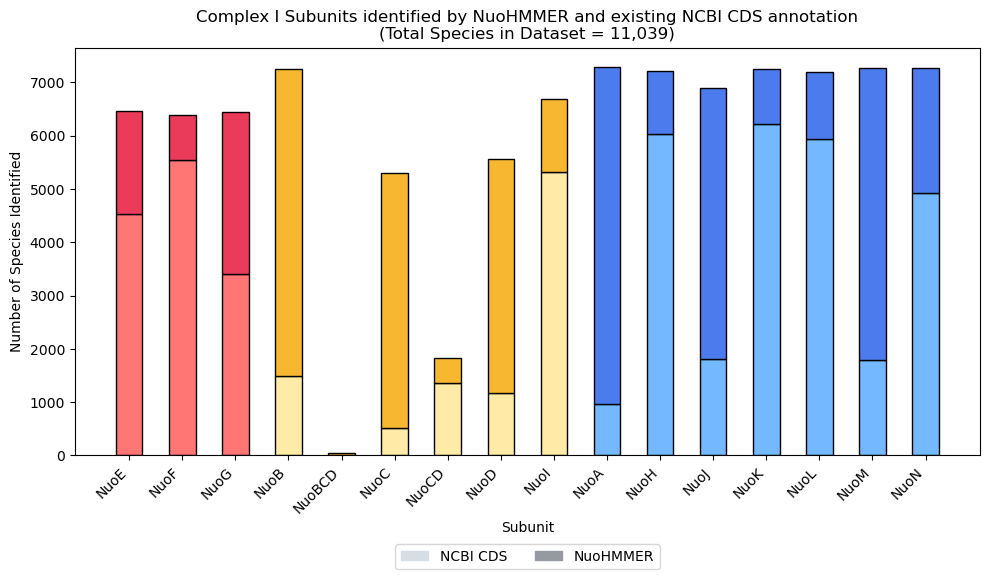

In [5]:
# Stacked Bar Plot with defined figure size and ordered bars
plt.figure(figsize=(10, 6))  # Defining the figure size

bar_width = 0.5
index = np.arange(len(all_subunits_ordered))

# Plot each subcategory stacked on top of each other
for i in range(species_count_ordered.shape[1]):
    colors = [ncbi_cds_colors[subunit] if category[i] == 'NCBI CDS' else subunits_colors[subunit] for subunit in all_subunits_ordered]
    plt.bar(index, species_count_ordered[:, i], bar_width, 
            label=category[i], 
            bottom=np.sum(species_count_ordered[:, :i], axis=1), 
            color=colors,
            edgecolor='black')  # Adding black edges to each bar

# Adjusting the x-ticks to be rotated at 45 degrees
plt.xlabel('Subunit')
plt.ylabel('Number of Species Identified')
plt.title(f'Complex I Subunits identified by NuoHMMER and existing NCBI CDS annotation\n(Total Species in Dataset = {total_species:,})')
plt.xticks(index, all_subunits_ordered, rotation=45, ha='right')
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Custom legend with specified colors
from matplotlib.patches import Patch

legend_colors = {'NCBI CDS': "#d7dde4", 'NuoHMMER': "#959aa0"}
legend_handles = [Patch(color=color, label=label) for label, color in legend_colors.items()]

# Move the legend to the bottom with custom colors
plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

plt.tight_layout()

plt.savefig(f"/Users/akshayonly/Work/04-Complex-I/Data/07-Figures/PNGs/ncbi_nuohmmer/horizontal_ncbi_nuohmmer5.png", dpi=500)
plt.savefig(f"/Users/akshayonly/Work/04-Complex-I/Data/07-Figures/PDFs/horizontal_ncbi_nuohmmer5.pdf", bbox_inches='tight', format='pdf', dpi=500)
# Show the plot
plt.show()

In [6]:
# # Stacked Bar Plot with defined figure size and ordered bars
# plt.figure(figsize=(10, 6))  # Defining the figure size

# bar_width = 0.5
# index = np.arange(len(all_subunits_ordered))

# # Plot each subcategory stacked on top of each other
# for i in range(species_count_ordered.shape[1]):
#     colors = [ncbi_cds_colors[subunit] if category[i] == 'NCBI CDS' else subunits_colors[subunit] for subunit in all_subunits_ordered]
#     plt.bar(index, species_count_ordered[:, i], bar_width, 
#             bottom=np.sum(species_count_ordered[:, :i], axis=1), 
#             color=colors,
#             edgecolor='black')  # Adding black edges to each bar

# # Remove axis labels and ticks
# plt.xlabel("")
# plt.ylabel("")
# plt.xticks([])
# plt.yticks([])

# # Remove the legend
# plt.legend([], [], frameon=False)

# # Remove the title
# plt.title("")

# # Save the plot without any text
# plt.savefig(f"/Users/akshayonly/Work/04-Complex-I/Data/07-Figures/PNGs/ncbi_nuohmmer/horizontal_ncbi_nuohmmer_no_text.png", dpi=500)
# plt.savefig(f"/Users/akshayonly/Work/04-Complex-I/Data/07-Figures/PDFs/horizontal_ncbi_nuohmmer_no_text.pdf", bbox_inches='tight', format='pdf', dpi=500)

# # Show the plot
# plt.show()

## Nuo cluster analysis

In [7]:
cds_bool_species_variation = cds_bool[['Species', 'Variation']].drop_duplicates()
nuo_bool_species_variation = nuo_bool[['Species', 'Variation']].drop_duplicates()

nuo_bool_species_variation_complete = nuo_bool_species_variation[nuo_bool_species_variation['Variation']!='Nuo-Partial']
nuo_bool_species_variation_partial = nuo_bool_species_variation[nuo_bool_species_variation['Variation']=='Nuo-Partial']
nuo_bool_species_variation_partial = nuo_bool_species_variation_partial[~nuo_bool_species_variation_partial['Species'].isin(nuo_bool_species_variation_complete['Species'])]

cds_bool_species_variation_complete = cds_bool_species_variation[cds_bool_species_variation['Variation']!='Nuo-Partial']
cds_bool_species_variation_partial = cds_bool_species_variation[cds_bool_species_variation['Variation']=='Nuo-Partial']
cds_bool_species_variation_partial = cds_bool_species_variation_partial[~cds_bool_species_variation_partial['Species'].isin(cds_bool_species_variation_complete['Species'])]

In [8]:
nuo_bool_species_variation_complete['Variation'].value_counts()

Variation
Nuo14        2769
Nuo13        1302
Nuo14-EFG      88
Nuo14-EF       63
Nuo12          10
Name: count, dtype: int64

In [9]:
cds_bool_species_variation_partial['Species'].nunique()

6071

In [10]:
nuo_bool_species_variation_partial['Species'].nunique()

3757

In [11]:
cds_bool_species_variation_complete['Species'].nunique()

546

In [12]:
nuo_bool_species_variation_complete['Species'].nunique()

4210